<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/Capstone%20-%20Craft%20Beer/CraftBeer_01_DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3: Craft Beer Recommendation 

#Data Wrangling (Part 1) 

## Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
reviews = pd.read_csv('beer_reviews.csv')
beers = pd.read_csv('beers.csv')
breweries = pd.read_csv('breweries.csv')

## Review Datasets

### Reviews Dataset

Reviews dataset has the main information we are looking for on how customers rate each beer across a number of categoreis including:
* Overall
* Aroma
* Appearance
* Palate
* Taste

This also includes the time of the review and the user's profile name.

The dataset also includes some information about the beer and brewery including:
* Beer Name
* Beer Style
* Beer ABV (Alcohol by Volume)
* Brewery Name

In [3]:
print('Reviews: ', reviews.shape)

Reviews:  (1586614, 13)


In [4]:
#reviews.head()

In [5]:
#reviews.describe()

In [6]:
#reviews.dtypes

#### Change Column Names

Update to Beer ID column to make cleaner.

In [7]:
reviews.rename(columns={'beer_beerid':'beer_id'}, inplace=True)

#### Format 'review_time' column

Date field appears to be in UNIX format which I will to convert to datetime object.

Below Stack Overflow article was used to identify solution

https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe 

In [8]:
reviews['review_time'] = pd.to_datetime(reviews['review_time'], unit='s')

In [9]:
reviews.head()
reviews.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_id                        int64
dtype: object

#### Missing Values

Three columns have missing values associated with them - brewery_name, review_profilename, and beer_abv. 

We know we have additional information in the brewery and beer datasets that might be able to support with missing brewery and beer information and therefore concentrated on review_profilenames for now. For this column, we simply repalced missing values with 'n/a' to designate they were not avaialable.

In [10]:
for x in reviews:
  print(x, ': ', reviews[x].isnull().sum())

brewery_id :  0
brewery_name :  15
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  348
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  67785
beer_id :  0


In [11]:
reviews.review_profilename.fillna('n/a', inplace=True)

In [12]:
#reviews.beer_abv.fillna(-999, inplace=True)

In [13]:
reviews.brewery_name.fillna('n/a', inplace=True)

In [14]:
for x in reviews:
  print(x, ': ', reviews[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  67785
beer_id :  0


#### Tidy Text Columns

I will look to tidy the text columns by:
* Replacing all non-letter characters with a space
* Putting all text into lower case

Doing this will help when looking to merge datasets later and reduce chance of inability to link being due to formatting.

In [15]:
reviews.beer_name = reviews.beer_name.str.replace('[^a-zA-Z]', ' ').str.lower()
reviews.brewery_name = reviews.brewery_name.str.replace('[^a-zA-Z]', ' ').str.lower()
reviews.review_profilename = reviews.review_profilename.str.replace('[^a-zA-Z]', ' ').str.lower()
reviews.beer_style = reviews.beer_style.str.replace('[^a-zA-Z]', ' ').str.lower()

In [16]:
#reviews.head()

### Beer Dataset

The Beers dataset appears to give us some more information that is not included in the reveiws dataset regarding each beer including:
* Availability
* Retired
* Additional Notes

In [17]:
print('Beers: ', beers.shape)

Beers:  (358873, 10)


In [18]:
#beers.head()

In [19]:
#beers.describe()

In [20]:
#beers.dtypes

#### Drop Brewery-related columns

We will drop columns related to the brewery as we know have 'brewery_id' in the reviews dataset and brewery dataset to link this in with.

In [21]:
beers.drop(columns=['brewery_id', 'state', 'country'], inplace=True)

#### Change Column Names

I will update the column names to clear state they relate to beers - this is mainly for later stages to avoid potential confusion when we start merging data.

In [22]:
beers.columns = ['beer_id', 'beer_name', 'beer_style', 'beer_availability', 'beer_abv', 'beer_notes', 'beer_retired']
beers.head()

,beer_id,beer_name,beer_style,beer_availability,beer_abv,beer_notes,beer_retired
0,202522,Olde Cogitator,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,American Cream Ale,Rotating,5.1,No notes at this time.,f


#### Missing Data

Three columns are missing data - beer_style, beer_abv, and beer_notes.

* **beer_style:** Replaced the 1 missing value with 'n/a'.
* **beer_notes:** Replaced the missing values with 'No notes at this time.' as this is the most common value for this field.
* **beer_abv:** There is again a large number of missing values. To indicate these are missing in a numerical format, I have replaced missing values with -999 (similar to review dataset). When it comes to merging datasets, this will allow them to match but we will still have to figure out a way to deal with these values later if large number still remain.

In [23]:
for x in beers:
  print(x, ': ', beers[x].isnull().sum())

beer_id :  0
beer_name :  0
beer_style :  1
beer_availability :  0
beer_abv :  38797
beer_notes :  46
beer_retired :  0


In [24]:
beers.beer_style.unique()
beers.beer_style.fillna('n/a', inplace=True)

In [25]:
beers.beer_notes.value_counts()
beers.beer_notes.fillna('No notes at this time.', inplace=True)

In [26]:
#beers.beer_abv.fillna(-999, inplace=True)

In [27]:
for x in beers:
  print(x, ': ', beers[x].isnull().sum())

beer_id :  0
beer_name :  0
beer_style :  0
beer_availability :  0
beer_abv :  38797
beer_notes :  0
beer_retired :  0


#### Tidy Text Columns

Again, I tidied the text columns by:
* Replacing all non-letter characters with a space
* Putting all text into lower case

Doing this will help when looking to merge datasets later and reduce chance of inability to link being due to formatting.

In [28]:
beers.beer_name = beers.beer_name.str.replace('[^a-zA-Z]', ' ').str.lower()
beers.beer_style = beers.beer_style.str.replace('[^a-zA-Z]', ' ').str.lower()
beers.beer_notes = beers.beer_notes.str.replace('[^a-zA-Z]', ' ').str.lower()
beers.beer_availability = beers.beer_availability.str.replace('[^a-zA-Z]', ' ').str.lower()

In [29]:
beers.head()

,beer_id,beer_name,beer_style,beer_availability,beer_abv,beer_notes,beer_retired
0,202522,olde cogitator,english oatmeal stout,rotating,7.3,no notes at this time,f
1,82352,konrads stout russian imperial stout,russian imperial stout,rotating,10.4,no notes at this time,f
2,214879,scottish right,scottish ale,year round,4.0,no notes at this time,t
3,320009,megameow imperial stout,american imperial stout,winter,8.7,every time this year,f
4,246438,peaches n cream,american cream ale,rotating,5.1,no notes at this time,f


In [30]:
#beers.beer_notes.value_counts()

### Brewery Dataset

The Brewery dataset gives us more information on the brewery:
* City
* State
* Country
* Brewery Type
* Additional Notes

In [31]:
print('Breweries: ', breweries.shape)

Breweries:  (50347, 7)


In [32]:
#breweries.head()

In [33]:
#breweries.describe()
#breweries.dtypes

#### Change Column Names

I'll update the column names os that they reflect that they relate to brewery information to avoid confusion later when looking to merge datasets.

In [34]:
breweries.columns = ['brewery_id', 'brewery_name', 'brewery_city', 'brewery_state', 'brewery_country', 'brewery_notes', 'brewery_types']
breweries.head()

,brewery_id,brewery_name,brewery_city,brewery_state,brewery_country,brewery_notes,brewery_types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


#### Missing Data

In [35]:
for x in breweries:
  print(x, ': ', breweries[x].isnull().sum())

brewery_id :  0
brewery_name :  0
brewery_city :  58
brewery_state :  11271
brewery_country :  6
brewery_notes :  85
brewery_types :  0


##### Brewery Country

Looked at 6 rows with null values on country name to see if possible to impute from information available.
* Four rows related to Namibian ciites of Windhoek and Swakopmund so updated country to reflect this
* Did Google search on names of other two breweries to imput information on their location

In [36]:
breweries[breweries.brewery_country.isnull()]

,brewery_id,brewery_name,brewery_city,brewery_state,brewery_country,brewery_notes,brewery_types
9915,1722,Namibia Breweries Limited,Windhoek,NaN,NaN,No notes at this time.,Brewery
29270,41084,Brew Craft Namibia / Das Brücken Haus,Windhoek,NaN,NaN,No notes at this time.,"Brewery, Bar, Homebrew, Beer-to-go"
30314,11016,Privatbrauerei Josef / Trumer Brauerei,NaN,NaN,NaN,No notes at this time.,Brewery
31869,1723,Hansa Brauerei / Namibia Breweries,Swakopmund,NaN,NaN,At least some of the beer is contract brewed b...,Brewery
38980,20786,Camelthorn Brewing Company Ltd,Windhoek,NaN,NaN,No notes at this time.,Brewery
45345,18989,Barley's Brewing Company,NaN,NaN,NaN,No notes at this time.,Brewery


In [37]:
breweries['brewery_country'] = np.where((breweries.brewery_city == 'Windhoek'),'NA',breweries.brewery_country)
breweries['brewery_country'] = np.where((breweries.brewery_city == 'Swakopmund'),'NA',breweries.brewery_country)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Barley's Brewing Company"), "Columbus" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Barley's Brewing Company"), "OH" ,breweries.brewery_state)
breweries['brewery_country'] = np.where((breweries.brewery_name == "Barley's Brewing Company"), "US" ,breweries.brewery_country)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Privatbrauerei Josef / Trumer Brauerei"), "Salzburg" ,breweries.brewery_city)
breweries['brewery_country'] = np.where((breweries.brewery_name == "Privatbrauerei Josef / Trumer Brauerei"), "AT" ,breweries.brewery_country)

In [38]:
#breweries[breweries.brewery_country.isnull()]

In [39]:
#breweries[breweries.brewery_country == 'NA']

In [40]:
#breweries[breweries.brewery_name == "Barley's Brewing Company"]

In [41]:
#breweries[breweries.brewery_name == "Privatbrauerei Josef / Trumer Brauerei"]

##### Brewery City

For brewery_city column, I went through the list of 58 null values to see if these could be identified through searching the brewery name. For US breweries, I inputted the brewery_state also.

In [42]:
#breweries[breweries.brewery_city.isnull()]

In [43]:
breweries['brewery_city'] = np.where((breweries.brewery_name == "Hops! La Fabbrica della Birra"), "Reggio Emilia" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Big Buck Brewery & Steakhouse"), "Gaylord" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Big Buck Brewery & Steakhouse"), "MI" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Tooheys Brewing"), "Sydney" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "New Zealand Breweries Limited"), "Auckland" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Sebago Brewing Company"), "Scarborough" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Sebago Brewing Company"), "ME" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Weeping Radish Brewery & Bavarian Restaurant"), "Grandy" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Weeping Radish Brewery & Bavarian Restaurant"), "NC" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Frog Pubs"), "Paris" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "3er Tiempo Tienda De Cervezas"), "Santander" ,breweries.brewery_city)

In [44]:
breweries['brewery_city'] = np.where((breweries.brewery_name == "Shipyard Brewing Co."), "Portland" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Shipyard Brewing Co."), "ME" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Tinkoff Brewery"), "St. Petersburg" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Tied House Cafe & Brewery"), "Mountain View" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Tied House Cafe & Brewery"), "CA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Cerveza De Cuba"), "Havana" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Steelhead Brewing Co."), "Eugene" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Steelhead Brewing Co."), "OR" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Hops Grillhouse & Brewery"), "Alexandria" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Hops Grillhouse & Brewery"), "VA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Lübeck Cerveja"), "Sao Paulo" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Iron Hill Brewery & Restaurant"), "Exton" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Iron Hill Brewery & Restaurant"), "PA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Brewlander & Co."), "Singapore" ,breweries.brewery_city)

In [45]:
breweries['brewery_city'] = np.where((breweries.brewery_name == "Triumph Brewing"), "Princeton" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Triumph Brewing"), "NJ" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Stingray Brewery"), "Grand Cayman" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Ram International / Humperdinks Restaurant and Big Horn Brewing"), "Lakewood" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Ram International / Humperdinks Restaurant and Big Horn Brewing"), "WA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Liberty Steakhouse Brewery"), "Myrtle Beach" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Liberty Steakhouse Brewery"), "SC" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "K&L Italian Beers Manufacturing"), "Veneto" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Barley's Smokehouse and Brewpub"), "Columbus" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Barley's Smokehouse and Brewpub"), "OH" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Granite City Food & Brewery"), "Minnetonka" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Granite City Food & Brewery"), "MN" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Hereford & Hops Restaurant & Brewpub"), "Escanaba" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Hereford & Hops Restaurant & Brewpub"), "MI" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Jacob Leinenkugel Brewing Co."), "Chippewa Falls" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Jacob Leinenkugel Brewing Co."), "WI" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Verhovinska Pivovarnya"), "Verkhovyna" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Empire Brewing Company"), "Syracuse" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Empire Brewing Company"), "NY" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Two Rows Breweries & Grills"), "Allen" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Two Rows Breweries & Grills"), "TX" ,breweries.brewery_state)

In [46]:
breweries['brewery_city'] = np.where((breweries.brewery_name == "Fat Sparrow"), "Liérganes" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "La Arboleda Cervecería Artesanal"), "San José" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Full Sail Brewing Company"), "Hood River" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Full Sail Brewing Company"), "OR" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Mac's Brewery"), "Wellington" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Utah Brewers Cooperative"), "Salt Lake City" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "E & O Trading Company"), "San Francisco" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "E & O Trading Company"), "CA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Capitol City Brewing Company"), "Washington DC" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Capitol City Brewing Company"), "DC" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Il Vicino Wood Oven Pizza and Brewery"), "Wichita" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Il Vicino Wood Oven Pizza and Brewery"), "KS" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Cliff Top Brewing Company"), "Bocholt" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Brew Moon Restaurant & Microbrewery"), "Honolulu" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Brew Moon Restaurant & Microbrewery"), "HI" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Prague Breweries Group"), "Prague" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Blue Corn Cafe and Brewery"), "Santa Fe" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Blue Corn Cafe and Brewery"), "NM" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Buckhead Brewery and Grill"), "Stockbridge" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Buckhead Brewery and Grill"), "GA" ,breweries.brewery_state)

In [47]:
breweries['brewery_city'] = np.where((breweries.brewery_name == "Paulista Brewery"), "Sao Paulo" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Mendocino Brewing Company"), "Ukiah" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Mendocino Brewing Company"), "CA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Rock Bottom Restaurant & Brewery"), "San Jose" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Rock Bottom Restaurant & Brewery"), "CA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Bokkereyder"), "Hasselt" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Bedele Brewery"), "Addis Ababa" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Snake River Brewing"), "Jackson" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Snake River Brewing"), "WY" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "McMenamins"), "Portland" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "McMenamins"), "OR" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Gordon Biersch Brewery Restaurant"), "Las Vegas" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Gordon Biersch Brewery Restaurant"), "NV" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "BJ's Chicago Pizza & Brewery Inc."), "Huntington Beach" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "BJ's Chicago Pizza & Brewery Inc."), "CA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Sonora Brewing Company"), "Sonora" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Sonora Brewing Company"), "CA" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Thirsty Dog Brewing Company"), "Akron" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Thirsty Dog Brewing Company"), "OH" ,breweries.brewery_state)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Bennett's Bar & Lounge"), "Ardcath" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Utenos Alus"), "Utena" ,breweries.brewery_city)

breweries['brewery_city'] = np.where((breweries.brewery_name == "Sea Dog Brewing Company"), "Bangor" ,breweries.brewery_city)
breweries['brewery_state'] = np.where((breweries.brewery_name == "Sea Dog Brewing Company"), "ME" ,breweries.brewery_state)

In [48]:
#breweries[breweries.brewery_city.isnull()]

In [49]:
#print(np.array(breweries[breweries.brewery_id == 3079]['brewery_name']))

##### Brewery State

brewery_state has a large number of missing values (11, 236). After closer inspection, this shows that these missing values all relate to countries outside of the US, Canada and GB where this information must not have been available. There are were two options to deal with this:
1. Put as 'n/a'
2. Put as country code (with 0 at end to avoid overlap with US or CA states)

For potential that it is better to analyse data at state-level (with country as proxy when state not available), I've decided to go with second approach.

In [50]:
print('Brewery State Nulls (Overall): ', breweries['brewery_state'].isnull().sum())
print('Brewery State Nulls (US): ',   breweries[breweries['brewery_country'] == 'US']['brewery_state'].isnull().sum())
print('Brewery State Nulls (Canada): ',   breweries[breweries['brewery_country'] == 'CA']['brewery_state'].isnull().sum())
print('Brewery State Nulls (GB): ',   breweries[breweries['brewery_country'] == 'GB']['brewery_state'].isnull().sum())
print('Brewery State Nulls (Outside US, Canada, and GB): ', breweries.loc[(breweries.brewery_country != 'US') & (breweries.brewery_country != 'CA') & (breweries.brewery_country != 'GB')]['brewery_state'].isnull().sum())

Brewery State Nulls (Overall):  11237
Brewery State Nulls (US):  0
Brewery State Nulls (Canada):  0
Brewery State Nulls (GB):  0
Brewery State Nulls (Outside US, Canada, and GB):  11237


In [51]:
#breweries[breweries['brewery_country'] != 'US']['brewery_state'].value_counts()

In [52]:
breweries.brewery_state.fillna(breweries.brewery_country+'0', inplace=True)

##### Brewery Notes

In [53]:
breweries.brewery_notes.value_counts()
breweries.brewery_notes.fillna('No notes at this time.', inplace=True)

In [54]:
breweries.brewery_notes.value_counts()

No notes at this time.                                                                                                                                                                                                                                                                                                                                                                              46560
Hours:                                                                                                                                                                                                                                                                                                                                                                                                136
 No notes at this time.                                                                                                                                                                                             

In [55]:
breweries['brewery_notes'] = breweries.brewery_notes.str.strip()

##### Final Check

There are no null values in breweries dataset.

In [56]:
for x in breweries:
  print(x, ': ', breweries[x].isnull().sum())

brewery_id :  0
brewery_name :  0
brewery_city :  0
brewery_state :  0
brewery_country :  0
brewery_notes :  0
brewery_types :  0


#### Brewery Type

From review of brewery_types column, there seems to be six unique types of breweries (each which can be some combination of the below types):
* Bar
* Eatery
* Brewery
* Beer-to-go
* Store
* Homebrew

To make this data easier to analyse going forward, I will create boolean columns for each of these brewery types and then delete the brewery_type column.

In [57]:
#breweries.brewery_types.value_counts()

In [58]:
breweries.brewery_types = breweries.brewery_types.str.replace('-', '').str.lower()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0, max_df=0.999)

cv.fit(breweries['brewery_types'])
cv_transformed = cv.transform(breweries['brewery_types'])

cv_df = pd.DataFrame(cv_transformed.toarray(), columns=cv.get_feature_names()).add_prefix('brewery_')
print(cv_df.head())
print(cv_df.columns)

   brewery_bar  brewery_beertogo  ...  brewery_homebrew  brewery_store
0            0                 0  ...                 0              0
1            1                 1  ...                 0              0
2            1                 0  ...                 0              0
3            0                 0  ...                 0              1
4            1                 0  ...                 0              0

[5 rows x 6 columns]
Index(['brewery_bar', 'brewery_beertogo', 'brewery_brewery', 'brewery_eatery',
       'brewery_homebrew', 'brewery_store'],
      dtype='object')


In [59]:
breweries = pd.concat([breweries, cv_df], axis=1, sort=False)

In [60]:
#breweries['brewery_bar'] = breweries.brewery_types.str.contains('Bar')
#breweries['brewery_eatery'] = breweries.brewery_types.str.contains('Eatery')
#breweries['brewery_brewery'] = breweries.brewery_types.str.contains('Brewery')
#breweries['brewery_beertogo'] = breweries.brewery_types.str.contains('Beer-to-go')
#breweries['brewery_store'] = breweries.brewery_types.str.contains('Store')
#breweries['brewery_homebrew'] = breweries.brewery_types.str.contains('Homebrew')

In [61]:
breweries.sample(10)

,brewery_id,brewery_name,brewery_city,brewery_state,brewery_country,brewery_notes,brewery_types,brewery_bar,brewery_beertogo,brewery_brewery,brewery_eatery,brewery_homebrew,brewery_store
24980,3614,Riverhead Brewery Limited,"Marsden, Huddersfield",GB2,GB,No notes at this time.,"brewery, bar, eatery",1,0,1,1,0,0
11818,36154,Harvest Country Store,West Hartford,CT,US,No notes at this time.,store,0,0,0,0,0,1
12240,26935,Yard House,Palmdale,CA,US,No notes at this time.,"bar, eatery",1,0,0,1,0,0
19675,23446,Cook's Discount Liquors,Pennsauken,NJ,US,No notes at this time.,store,0,0,0,0,0,1
32822,37846,Home Republic,Virginia Beach,VA,US,No notes at this time.,"brewery, bar, eatery",1,0,1,1,0,0
30263,43378,Crane Brewing Company,Raytown,MO,US,No notes at this time.,"brewery, bar",1,0,1,0,0,0
26060,32859,Cervejaria Dortmund,Serra Negra,BR0,BR,No notes at this time.,brewery,0,0,1,0,0,0
1341,37905,Bamfield General Store,Bamfield,BC,CA,No notes at this time.,store,0,0,0,0,0,1
1480,43727,Cerveza Gastro,Cuenca,ES0,ES,Cerveza Artesana de Autor,brewery,0,0,1,0,0,0
14652,17070,Belmont Beverage - Lima Road,Fort Wayne,IN,US,No notes at this time.,store,0,0,0,0,0,1


In [62]:
breweries.drop(columns='brewery_types', inplace=True)

#### Tidy Text Column

In [63]:
breweries.brewery_name = breweries.brewery_name.str.replace('[^a-zA-Z]', ' ').str.lower()
#breweries.brewery_city = breweries.brewery_city.str.replace('[^a-zA-Z]', ' ').str.lower()
#breweries.brewery_state = breweries.brewery_state.str.replace('[^a-zA-Z]', ' ').str.lower()
#breweries.brewery_country = breweries.brewery_country.str.replace('[^a-zA-Z]', ' ').str.lower()
breweries.brewery_notes = breweries.brewery_notes.str.replace('[^a-zA-Z]', ' ').str.lower().str.strip()
#breweries.brewery_types = breweries.brewery_types.str.replace('[^a-zA-Z]', ' ').str.lower()

In [64]:
#breweries.head()

### Recap

In [65]:
reviews.head()
reviews.dtypes

for x in reviews:
  print(x, ': ', reviews[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  67785
beer_id :  0


In [66]:
beers.head()
beers.dtypes

for x in beers:
  print(x, ': ', beers[x].isnull().sum())

beer_id :  0
beer_name :  0
beer_style :  0
beer_availability :  0
beer_abv :  38797
beer_notes :  0
beer_retired :  0


In [67]:
breweries.head()
breweries.dtypes

for x in breweries:
  print(x, ': ', breweries[x].isnull().sum())

brewery_id :  0
brewery_name :  0
brewery_city :  0
brewery_state :  0
brewery_country :  0
brewery_notes :  0
brewery_bar :  0
brewery_beertogo :  0
brewery_brewery :  0
brewery_eatery :  0
brewery_homebrew :  0
brewery_store :  0


## Beers Analysis

Ahead of merging the Beers dataset with our Reviews data, I want to compare the beer information in both datasets to see if this matches correctly.

To do this, I will look at three columns that are commom across the two datasets. This includes:
* Beer ID
* Beer Name
* Beer Sytle

Although Beer ABV is in both datasets, I will not look to use this as a matching criteria due the number of null values present in both the reviews and beers datasets.

I will then look to match the data across all four areas to see if this works. If not, I will investigate to see the root cause.

### Create Beer Summary Files

#### Beer Summary (Reviews Data)

First, I will summarise the Reviews dataset to beer-level using the grouby function.

This shows that there are 66,055 different beers mentioned in the reviews dataset.

In [68]:
reviews_beersumm = reviews.groupby(by=['beer_id', 'beer_name', 'beer_style'], as_index=False)['review_overall'].agg(['mean', 'count']).reset_index()

In [69]:
reviews_beersumm.drop(columns=['mean', 'count'], inplace=True)

In [70]:
reviews_beersumm.beer_id.count()

66055

In [71]:
reviews.beer_id.nunique()
#reviews.beer_name.nunique()

66055

In [72]:
#reviews_beersumm.dtypes
reviews_beersumm.head()

,beer_id,beer_name,beer_style
0,3,cactus queen ipa,american ipa
1,4,wildcatter s crude stout,american stout
2,5,amber,vienna lager
3,6,turbodog,english brown ale
4,7,purple haze,fruit vegetable beer


#### Beer Summary (Beer Dataset)

Next, I look to check that beers dataset only contains rows for the number of unique beer_id - which it does (358,873). 

Following this, I reduced dataset to only the three columsn for our comparison.

In [73]:
beers.beer_id.count()

358873

In [74]:
beers.beer_id.nunique()

358873

In [75]:
beersumm = beers.drop(columns=['beer_abv', 'beer_availability', 'beer_notes', 'beer_retired'])

In [76]:
#beersumm.dtypes
beersumm.head()

,beer_id,beer_name,beer_style
0,202522,olde cogitator,english oatmeal stout
1,82352,konrads stout russian imperial stout,russian imperial stout
2,214879,scottish right,scottish ale
3,320009,megameow imperial stout,american imperial stout
4,246438,peaches n cream,american cream ale


### Identify Matching Beers

#### Merge Summary Data

Now, I'll merge the two datasets together to allow for comparing values across them.

The 66,055 beers is the number we wanted to see here given we did a left join on the beers from review dataset.

In [77]:
beersumm_merge = pd.merge(reviews_beersumm, beersumm, how='left', on=['beer_id'])

In [78]:
beersumm_merge.head()

,beer_id,beer_name_x,beer_style_x,beer_name_y,beer_style_y
0,3,cactus queen ipa,american ipa,cactus queen ipa,american ipa
1,4,wildcatter s crude stout,american stout,wildcatter s crude stout,american stout
2,5,amber,vienna lager,amber,vienna lager
3,6,turbodog,english brown ale,turbodog,english brown ale
4,7,purple haze,fruit vegetable beer,purple haze,fruit and field beer


In [79]:
beersumm_merge.beer_id.count()

66055

#### How many missing values?

The first comparison I will do is to see how many null values are in this comparison dataset - this will indicate if a beer is in the review dataset, but not in the beers dataset). 

Doing this, shows that 564 beers (or less than 1%) are in the Reviews dataset are not in the Beers dataset.

In [80]:
nulls = beersumm_merge.beer_name_y.isnull().sum()
total_rows = beersumm_merge.beer_id.count()

print('Name null values: ', nulls)
print('% of data: ', round(((nulls / total_rows) * 100), 2))

Name null values:  564
% of data:  0.85


In [81]:
nulls = beersumm_merge.beer_style_y.isnull().sum()
total_rows = beersumm_merge.beer_id.count()

print('Name null values: ', nulls)
print('% of data: ', round(((nulls / total_rows) * 100), 2))

Name null values:  564
% of data:  0.85


#### How many mismatched beers?

Next, I looked at whether the other columns across the datasets matched. The question here is that - even though the unique ID matched - do the beer names and beer styles match across datasets? 

Unfortunately, this brings up a few concerns as there are a large number of mismatched rows between the datasest - beer names (10.3%) and beer style (47.5%).

However, from review of the mistach columns, a lot of the names and styles were entered in slightly different but represented the same thing. Examples of this include:
* Beer Styles
  * English Old Ale vs Old Ale
  * Belgian Witbier vs Witbier
* Beer Names
  * George Killian's Irish Red vs Killian's Irish Red
  * Nemesis 2009 vs Founders Nemesis 2009

In the next section, we look at how we use link the datasets to take account of these close but not exact records.

In [82]:
mismatch = beersumm_merge[beersumm_merge.beer_name_x != beersumm_merge.beer_name_y]['beer_id'].count()

print('Mismatch Rows: ', mismatch)
print('% of data: ', round(((mismatch / total_rows) * 100), 2))

Mismatch Rows:  6830
% of data:  10.34


In [83]:
mismatch = beersumm_merge[beersumm_merge.beer_style_x != beersumm_merge.beer_style_y]['beer_id'].count()

print('Mismatch Rows: ', mismatch)
print('% of data: ', round(((mismatch / total_rows) * 100), 2))

Mismatch Rows:  31389
% of data:  47.52


In [84]:
beersumm_merge[beersumm_merge.beer_name_x != beersumm_merge.beer_name_y][['beer_name_x', 'beer_name_y']].sample(5)

,beer_name_x,beer_name_y
18040,india pale ale,roundhouse india pale ale
51456,idiot sauvin,savant
37647,matilda bay sebastian reserve,sebastian reserve
62323,belgian strong ale,brewer s reserve blackfoot river belgian stron...
9882,funk,NaN


In [85]:
beersumm_merge[beersumm_merge.beer_style_x != beersumm_merge.beer_style_y][['beer_style_x', 'beer_style_y']].sample(5)

,beer_style_x,beer_style_y
16931,bock,german bock
16028,american pale lager,american lager
4590,smoked beer,smoke beer
24945,maibock helles bock,german maibock
65497,saison farmhouse ale,belgian saison


#### Using Record Linkage to find pairs

As we don't want to loss all the data related to the beers where there is not an exact match, I look to apply the recordlinkage package to the dataset to identify the beers from the beers dataset that pair well (but not exactly) with the reviews dataset. 

To do this, I apply the following criteria and state that two of these must be met to match the beer dataset to the reviews:
*   Exact match on beer_id
*   Match on beer_name at 0.9 threshold
*   Match on beer_style at 0.9 threshold

This leaves us with 63,080 of the review beers matching (or 95.5%). These are saved in a new dataset called beers_new that we will use to merge to the reviews dataset next.

In [86]:
! pip install recordlinkage

In [87]:
# Import recordlinkage
import recordlinkage

# Create indexing object
indexer = recordlinkage.Index()

# Generate pairs blocked on id
indexer.block('beer_id')
pairs = indexer.index(reviews_beersumm, beersumm)

# Generate the pairs
pairs = indexer.index(reviews_beersumm, beersumm)

# Create a Compare object
compare_cl = recordlinkage.Compare()

# Find exact matches for pairs of id and abv
compare_cl.exact('beer_id', 'beer_id', label='beer_id')
#compare_cl.exact('beer_abv', 'beer_abv', label='beer_abv')

# Find similar matches for pairs of beer_name and beer_style using string similarity
compare_cl.string('beer_name', 'beer_name', threshold=0.8, label='beer_name')
compare_cl.string('beer_style', 'beer_style', threshold=0.8, label='beer_style')

# Find matches
potential_matches = compare_cl.compute(pairs, reviews_beersumm, beersumm)

In [88]:
potential_matches
potential_matches[potential_matches.sum(axis = 1) >= 2]

,,beer_id,beer_name,beer_style
0,8752,1,1.0,1.0
1,8760,1,1.0,1.0
2,8817,1,1.0,1.0
3,8818,1,1.0,1.0
4,8819,1,1.0,0.0
...,...,...,...,...
66050,115051,1,1.0,1.0
66051,321177,1,1.0,1.0
66052,84528,1,1.0,0.0
66053,97999,1,1.0,1.0


In [89]:
potential_matches['beer_id'].count()
match_rows = potential_matches[potential_matches.sum(axis = 1) >= 2]['beer_id'].count()

print('Potential Match Rows: ', match_rows)
print('No Beer Match: ', total_rows - match_rows)
print('% of data: ', round(((match_rows / total_rows) * 100), 2))

Potential Match Rows:  63080
No Beer Match:  2975
% of data:  95.5


In [90]:
#potential_matches['beer_name'].sum()
#potential_matches['beer_style'].sum()

In [91]:
matches = potential_matches[potential_matches.sum(axis = 1) >= 2]
match_index = matches.index.get_level_values(1)
beers_new = beers[beers.index.isin(match_index)]
beers_new.head()

,beer_id,beer_name,beer_style,beer_availability,beer_abv,beer_notes,beer_retired
5,8036,world burp beer,japanese rice lager,limited brewed once,5.5,no notes at this time,t
9,29556,warrior s bock,german bock,rotating,7.5,no notes at this time,t
12,15271,belgian style wit,belgian witbier,year round,4.5,no notes at this time,t
13,69212,r serve no,american strong ale,limited brewed once,11.8,no notes at this time,t
21,15645,cerveza india,american adjunct lager,year round,NaN,no notes at this time,t


### Bringing it all together

In [92]:
df = pd.merge(reviews, beers_new, how='left', on='beer_id')

In [93]:
for x in df:
  print(x, ': ', df[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style_x :  0
review_palate :  0
review_taste :  0
beer_name_x :  0
beer_abv_x :  67785
beer_id :  0
beer_name_y :  170924
beer_style_y :  170924
beer_availability :  170924
beer_abv_y :  218058
beer_notes :  170924
beer_retired :  170924


### Tidying Up

#### ABV Missing Values

First, I look to replace any missing values in the initial Reviews ABV column with ABV values from the Beers dataset - this reduces the number of missing values from 67,785 to 50,431.

In [94]:
df.beer_abv_x.fillna(df.beer_abv_y, inplace=True)

In [95]:
for x in df:
  print(x, ': ', df[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style_x :  0
review_palate :  0
review_taste :  0
beer_name_x :  0
beer_abv_x :  50431
beer_id :  0
beer_name_y :  170924
beer_style_y :  170924
beer_availability :  170924
beer_abv_y :  218058
beer_notes :  170924
beer_retired :  170924


#### ABV Difference

I looked at the difference in ABV between the two datasets. 

Initially, there looks like there is a large number rows with ABV discrepencies that we will have to account for (424,679). However, looking in more detail shows that over half these (218,058) are related to null values for ABV in either the Beers or Reviews dataset. 

The remaining discrepencies (206,621) are then plotted on a histogram to see the distribution of differences. This shows are a normal distribution around 0. The change in ABV could be related to different variations of the beer having slightly higher or lower ABV but should not impact on the addtional information provided for the dataset. 

With this in mind, we will keep the ABV in the Reviews dataset but maintain the additional information included from the Beers dataset as I believe this is still valid and useful to the analysis.

In [96]:
df['abv_diff'] = df.beer_abv_x - df.beer_abv_y

In [97]:
print('Total Rows ABV not matching: ', df.loc[(df.abv_diff != 0)]['beer_id'].count())

print('Not matching due to null in Beer dataset: ', df.loc[(df.abv_diff != 0) & (df.beer_abv_x.notnull()) & (df.beer_abv_y.isnull())]['beer_id'].count())
print('Not matching due to null in Review dataset: ', df.loc[(df.abv_diff != 0) & (df.beer_abv_x.isnull()) & (df.beer_abv_y.notnull())]['beer_id'].count())
print('Not matching due to nulls in both datasets: ', df.loc[(df.abv_diff != 0) & (df.beer_abv_x.isnull()) & (df.beer_abv_y.isnull())]['beer_id'].count())
print('Not matching due to difference in ABV levels: ', df.loc[(df.abv_diff != 0) & (df.beer_abv_x.notnull()) & (df.beer_abv_y.notnull())]['beer_id'].count())

Total Rows ABV not matching:  424679
Not matching due to null in Beer dataset:  167627
Not matching due to null in Review dataset:  0
Not matching due to nulls in both datasets:  50431
Not matching due to difference in ABV levels:  206621


In [98]:
#df.loc[(df.abv_diff != 0) & (df.beer_abv_y.notnull())]
#df.loc[(df.abv_diff != 0)].sample(10)

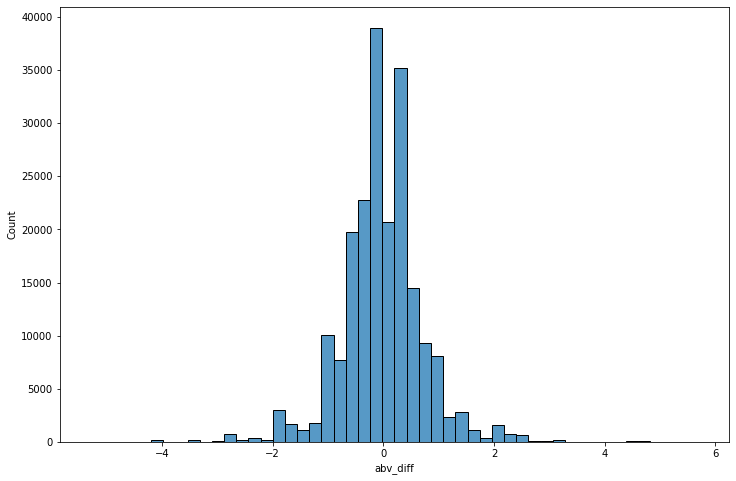

In [99]:
_ = plt.figure(figsize=(12,8))
_ = sns.histplot(data=df.loc[(df.abv_diff != 0) & (df.beer_abv_x.notnull()) & (df.beer_abv_y.notnull())], x='abv_diff', bins=50)

plt.show()

In [100]:
from scipy import stats

k2, p = stats.normaltest(df.loc[(df.abv_diff != 0) & (df.beer_abv_x.notnull()) & (df.beer_abv_y.notnull())]['abv_diff'])
alpha = 0.05

print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0
The null hypothesis can be rejected


#### Drop duplicate columns

In [101]:
df.drop(columns=['beer_name_y', 'beer_style_y', 'beer_abv_y', 'abv_diff'], inplace=True)

In [102]:
df.rename(columns={'beer_name_x':'beer_name', 'beer_style_x':'beer_style', 'beer_abv_x':'beer_abv'}, inplace=True)

In [103]:
#df.head()

In [104]:
for x in df:
  print(x, ': ', df[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  50431
beer_id :  0
beer_availability :  170924
beer_notes :  170924
beer_retired :  170924


#### ABV Missing Values (Part 2)

There are still 50,431 missing values that need to be accounted for.

Unlike some of the categorical columns, it is not as easy to input a 'n/a'. We could:
* Input a 0 value - but this has the meaning that beer contains no alcohol which likely is not the case
* Input a -99 - but this number may skew the analyis when it comes to modelling
* Input the average - will not be exact but give us a best guess estimate for what the ABV might be

Based on the choices, the decision was to go with the average ABV for the beer style of the beer with the missing ABV value - this gives the best estimate of this value given the information available to us. Doing this, means we no longer have any null values for the ABV column.

In [105]:
abv_by_beerstyle = df.groupby(by='beer_style')['beer_abv'].mean().reset_index()

abv_by_beerstyle.head()

,beer_style,beer_abv
0,altbier,5.822559
1,american adjunct lager,4.859886
2,american amber red ale,6.009012
3,american amber red lager,4.961354
4,american barleywine,10.703762


In [106]:
abv_by_beerstyle.shape

(104, 2)

In [107]:
df = pd.merge(df, abv_by_beerstyle, on='beer_style', how='left')

In [108]:
df.beer_abv_x.fillna(df.beer_abv_y, inplace=True)

In [109]:
df.beer_abv_x.isnull().sum()

0

In [110]:
df.drop(columns='beer_abv_y', inplace=True)

In [111]:
df.rename(columns={'beer_abv_x':'beer_abv'}, inplace=True)

#### Beer Availability

Look to tidy this column. 

* First, I reduce the number of unique variables by removing the whitespace in the text.
* Second, I replace null values with 'n/a' to show these are not available. During EDA stage we can see if this is appropriate category to continue with.

In [112]:
df.beer_availability.nunique()

16

In [113]:
#df.beer_availability.value_counts()

In [114]:
df['beer_availability'] = df.beer_availability.str.strip()

In [115]:
df.beer_availability.nunique()

7

In [116]:
#df.beer_availability.value_counts()

In [117]:
df.beer_availability.fillna('n/a', inplace=True)

In [118]:
df.beer_availability.value_counts()

year round              793449
rotating                244149
n/a                     170924
winter                  118787
limited  brewed once    113435
fall                     65559
summer                   41023
spring                   39288
Name: beer_availability, dtype: int64

#### Beer Notes

The beer notes contains a lot text that could be beneficial but may take a bit of time to investigate and tidy. Also, the top 3 notes don't provide that much additional:
* no notes at this time
* ibu
* ingredients

Based on this, I will remove this column from the dataset.




In [119]:
df.beer_notes.value_counts()
df.beer_notes.nunique()

9125

In [120]:
#reviews.beer_notes.value_counts()

In [121]:
df['beer_notes'] = df.beer_notes.str.strip()

In [122]:
df.beer_notes.nunique()

9041

In [123]:
df.beer_notes.value_counts()

no notes at this time                                                                                                                                                                                                                                                                                                                                                             705925
ibu                                                                                                                                                                                                                                                                                                                                                                                15113
ingredients                                                                                                                                                                                                                                           

In [124]:
df.drop(columns='beer_notes', inplace=True)

#### Beers Retired

Replace null values with 'n/a' to show these are not available. During EDA stage we can see if this is appropriate category to continue with.

In [125]:
df.beer_retired.fillna('n/a', inplace=True)

In [126]:
df.beer_retired.nunique()

3

In [127]:
df.beer_retired.value_counts()

f      1093675
t       322015
n/a     170924
Name: beer_retired, dtype: int64

#### Final Recap

In [128]:
#df.head()

In [129]:
for x in df:
  print(x, ': ', df[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  0
beer_id :  0
beer_availability :  0
beer_retired :  0


## Brewery Analysis

### Create Brewery Summary Files

#### Brewery Summary (Reviews Data)

Look to summarise the reviews dataset to see how many unique breweries it contains - this shows us that there are 5,840 breweries in the dataset. 

In [130]:
reviews_brewerysumm = reviews.groupby(by=['brewery_id', 'brewery_name'], as_index=False)['review_overall'].agg(['mean', 'count']).reset_index()
reviews_brewerysumm.drop(columns=['mean', 'count'], inplace=True)

In [131]:
reviews_brewerysumm.brewery_id.count()

5840

In [132]:
reviews_brewerysumm.head()

,brewery_id,brewery_name
0,1,plzensky prazdroj a s
1,2,yellow rose brewing company
2,3,abita brewing co
3,4,allagash brewing company
4,5,yakima brewing co bert grant s ales


#### Brewery Summary (Brewery Dataset)

Reduce the Brewery dataset to only contain brewery_id and brewery_name. This dataset still contains 50,347 breweries.

In [133]:
breweries.brewery_id.count()

50347

In [134]:
breweries.brewery_id.nunique()

50347

In [135]:
brewerysumm = breweries.drop(columns=['brewery_city', 'brewery_state', 'brewery_country', 'brewery_notes', 'brewery_bar', 'brewery_beertogo', 'brewery_brewery', 'brewery_eatery', 'brewery_homebrew', 'brewery_store'])

In [136]:
brewerysumm.head()

,brewery_id,brewery_name
0,19730,brouwerij danny
1,32541,coachella valley brewing co
2,44736,beef o brady s
3,23372,broadway wine merchant
4,35328,brighton beer dispensary duplicate


### Identify Matching Breweries

#### Merge Summary Data

In [137]:
brewerysumm_merge = pd.merge(reviews_brewerysumm, brewerysumm, how='left', on=['brewery_id'])

In [138]:
brewerysumm_merge.head()

,brewery_id,brewery_name_x,brewery_name_y
0,1,plzensky prazdroj a s,plze sk prazdroj
1,2,yellow rose brewing company,yellow rose brewing company
2,3,abita brewing co,abita brewing co
3,4,allagash brewing company,allagash brewing company
4,5,yakima brewing co bert grant s ales,yakima brewing co bert grant s ales


#### How many missing values?

In [139]:
nulls = brewerysumm_merge.brewery_name_y.isnull().sum()
total_rows = brewerysumm_merge.brewery_id.count()

print('Name null values: ', nulls)
print('% of data: ', round(((nulls / total_rows) * 100), 2))

Name null values:  15
% of data:  0.26


#### How many mismatched breweries?

In [140]:
mismatch = brewerysumm_merge[brewerysumm_merge.brewery_name_x != brewerysumm_merge.brewery_name_y]['brewery_id'].count()

print('Mismatch Rows: ', mismatch)
print('% of data: ', round(((mismatch / total_rows) * 100), 2))

Mismatch Rows:  481
% of data:  8.24


#### Using Record Linkage to find pairs 

In [141]:
# Create indexing object
indexer = recordlinkage.Index()

# Generate pairs blocked on id
indexer.block('brewery_id')
pairs = indexer.index(reviews_brewerysumm, brewerysumm)

# Generate the pairs
pairs = indexer.index(reviews_brewerysumm, brewerysumm)

# Create a Compare object
compare_cl = recordlinkage.Compare()

# Find exact matches for pairs of id
compare_cl.exact('brewery_id', 'brewery_id', label='brewery_id')

# Find similar matches for pairs of brewery_name using string similarity
compare_cl.string('brewery_name', 'brewery_name', threshold=0.8, label='brewery_name')

# Find matches
potential_matches = compare_cl.compute(pairs, reviews_brewerysumm, brewerysumm)

In [142]:
potential_matches[potential_matches.sum(axis = 1) >= 2]

,,brewery_id,brewery_name
1,16112,1,1.0
2,23348,1,1.0
3,38987,1,1.0
4,49940,1,1.0
5,18806,1,1.0
...,...,...,...
5835,23636,1,1.0
5836,11162,1,1.0
5837,40438,1,1.0
5838,27913,1,1.0


In [143]:
match_rows = potential_matches[potential_matches.sum(axis = 1) >= 2]['brewery_id'].count()

print('Potential Match Rows: ', match_rows)
print('No Beer Match: ', total_rows - match_rows)
print('% of data: ', round(((match_rows / total_rows) * 100), 2))

Potential Match Rows:  5471
No Beer Match:  369
% of data:  93.68


In [144]:
matches = potential_matches[potential_matches.sum(axis = 1) >= 2]
match_index = matches.index.get_level_values(1)

breweries_new = breweries[breweries.index.isin(match_index)]
breweries_new.head()

,brewery_id,brewery_name,brewery_city,brewery_state,brewery_country,brewery_notes,brewery_bar,brewery_beertogo,brewery_brewery,brewery_eatery,brewery_homebrew,brewery_store
0,19730,brouwerij danny,Erpe-Mere,BE0,BE,no notes at this time,0,0,1,0,0,0
20,8590,wet planet beverage co,Utica,NY,US,no notes at this time,0,0,1,0,0,0
22,26695,cervesera tramuntana,Palma,ES0,ES,no notes at this time,1,0,1,1,0,0
60,24133,luckie ales,Moulin,GB6,GB,no notes at this time,0,0,1,0,0,0
64,24814,yellowhammer brewing,Huntsville,AL,US,no notes at this time,1,0,1,0,0,0


In [145]:
breweries_new.shape

(5471, 12)

### Bring it together

Merging the brewery data into our main dataset (including reviews and beer data) shows that their are 251,996 rows where there is not match and the new columns are nulls.

In [146]:
df = pd.merge(df, breweries_new, how='left', on='brewery_id')

In [147]:
for x in df:
  print(x, ': ', df[x].isnull().sum())

brewery_id :  0
brewery_name_x :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  0
beer_id :  0
beer_availability :  0
beer_retired :  0
brewery_name_y :  251996
brewery_city :  251996
brewery_state :  251996
brewery_country :  251996
brewery_notes :  251996
brewery_bar :  251996
brewery_beertogo :  251996
brewery_brewery :  251996
brewery_eatery :  251996
brewery_homebrew :  251996
brewery_store :  251996


### Tidying Up

#### Brewery Name

There are two brewery name columns in the dataset so we will drop the one which was associated with the Brewery dataset and contains null values.

In [148]:
df.drop(columns='brewery_name_y', inplace=True)
df.rename(columns={'brewery_name_x':'brewery_name'}, inplace=True)
#df.head()

#### Brewery City, State & Country

There are 251,996 rows that did not match between the reviews and the breweries datasets which means we do not have information on the location of these breweries.

For now, we will put these missing values as 'n/a' in the dataset and can look to impute data at later stage (during EDA) if required.

In [149]:
df.brewery_city.fillna('n/a', inplace=True)
df.brewery_state.fillna('n/a', inplace=True)
df.brewery_country.fillna('n/a', inplace=True)

#### Brewery Type

Earlier we split the brewery_type field into 6 seperate boolean columns. Now, when merging we see that 251,996 rows that we couldn't match on will now need to have brewery_type associated with them. 

Because we do not know what type of breweries these are, I added in an additional boolean field to say if brewery type wasn't available - brewery_na set to 1 for null value rows and 0 for rows with values.

In [150]:
df['brewery_na'] = 0
df['brewery_na'] = np.where((df.brewery_bar.isnull()), 1 ,df.brewery_na)

In [151]:
df['brewery_bar'] = np.where((df.brewery_bar.isnull()), 0 ,df.brewery_bar)
df['brewery_beertogo'] = np.where((df.brewery_beertogo.isnull()), 0 ,df.brewery_beertogo)
df['brewery_brewery'] = np.where((df.brewery_brewery.isnull()), 0 ,df.brewery_brewery)
df['brewery_eatery'] = np.where((df.brewery_eatery.isnull()), 0 ,df.brewery_eatery)
df['brewery_homebrew'] = np.where((df.brewery_homebrew.isnull()), 0 ,df.brewery_homebrew)
df['brewery_store'] = np.where((df.brewery_store.isnull()), 0 ,df.brewery_store)

In [152]:
df['brewery_bar'] = df.brewery_bar.astype('int')
df['brewery_beertogo'] = df.brewery_beertogo.astype('int')
df['brewery_brewery'] = df.brewery_brewery.astype('int')
df['brewery_eatery'] = df.brewery_eatery.astype('int')
df['brewery_homebrew'] = df.brewery_homebrew.astype('int')
df['brewery_store'] = df.brewery_store.astype('int')

In [153]:
#df.dtypes

#### Brewery Notes

Similar to beer notes, the brewery notes contains a lot text that could be beneficial but may take a bit of time to investigate and tidy.  

Based on this, I will remove this column from the dataset.

In [154]:
df.brewery_notes.nunique()

743

In [155]:
df.brewery_notes.value_counts()

no notes at this time                                                                                                                                              780984
location of their r d facility where they also brew limited batches for the boston market  tours are also available                                                 39444
on site brewpub                                                                                                                                                     24083
owned by anheuser busch inbev                                                                                                                                       21190
mahou san miguel has a     ownership stake since                                                                                                                    20004
                                                                                                                                                      

In [156]:
df.drop(columns='brewery_notes', inplace=True)

#### Final Recap

In [157]:
for x in df:
  print(x, ': ', df[x].isnull().sum())

brewery_id :  0
brewery_name :  0
review_time :  0
review_overall :  0
review_aroma :  0
review_appearance :  0
review_profilename :  0
beer_style :  0
review_palate :  0
review_taste :  0
beer_name :  0
beer_abv :  0
beer_id :  0
beer_availability :  0
beer_retired :  0
brewery_city :  0
brewery_state :  0
brewery_country :  0
brewery_bar :  0
brewery_beertogo :  0
brewery_brewery :  0
brewery_eatery :  0
brewery_homebrew :  0
brewery_store :  0
brewery_na :  0


In [158]:
column_order = ['review_time', 'review_profilename', 'brewery_name', 'beer_name', 'beer_style', 'beer_abv', 'review_overall', 'review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'brewery_city', 'brewery_state', 'brewery_country', 'beer_availability', 'beer_retired', 'brewery_beertogo', 'brewery_brewery', 'brewery_eatery', 'brewery_homebrew', 'brewery_store', 'brewery_na']

df = df[column_order]

## Final Datasets

### Review-Level Dataset

The dataset that we pulled together so far is at review-level, meaning it has every review and score associated with that review (as well as the additional information related to beers and breweries we added to it).

This leaves us with 1.59 million rows and 22 dimensions.

In [159]:
#df.head()

In [160]:
df.shape

(1586614, 22)

### Beer-Level Dataset

Focus of our study is on understanding which beer is the most popular to support our decision on new beer to produce. With this in mind, we will also create a dataset that is grouped at beer-level.

For this, we will group across all the beer and brewery categories that we have in our main dataset and then get information on:
* Number of reviews for each beer
* Mean for each score (i.e. overall, appearance, aroma, palate, taste), for each beer
* Standard Deviation for each score, for each beer
* Lowest/min for each score, for each beer 
* Highest/max for each score, for each beer 

For Standard Deviation, there 23,672 that become null values due to there only being 1 review to calculate this from. For time-being, this has been inputed as 0.

Further review of this dataset will take place in the EDA section next.

In [161]:
beerlevel_groupby = ['brewery_name', 'beer_name', 'beer_style', 'beer_abv', 'brewery_city', 'brewery_state', 'brewery_country', 'beer_availability', 'beer_retired', 'brewery_beertogo', 'brewery_brewery', 'brewery_eatery', 'brewery_homebrew', 'brewery_store', 'brewery_na']

df_beer = df.groupby(by=beerlevel_groupby, as_index=False).agg(['mean', 'count', 'max', 'min', 'std']).reset_index()

In [162]:
new_columns = ['brewery_name', 'beer_name', 'beer_style', 'beer_abv', 'brewery_city', 'brewery_state', 'brewery_country', 'beer_availability', 
               'beer_retired', 'brewery_beertogo', 'brewery_brewery', 'brewery_eatery', 'brewery_homebrew', 'brewery_store', 'brewery_na',
               'review_overall_mean', 'review_overall_count', 'review_overall_max', 'review_overall_min', 'review_overall_std',
               'review_appearance_mean', 'review_appearance_count', 'review_appearance_max', 'review_appearance_min', 'review_appearance_std',
               'review_aroma_mean', 'review_aroma_count', 'review_aroma_max', 'review_aroma_min', 'review_aroma_std',
               'review_palate_mean', 'review_palate_count', 'review_palate_max', 'review_palate_min', 'review_palate_std',
               'review_taste_mean', 'review_taste_count', 'review_taste_max', 'review_taste_min', 'review_taste_std']

df_beer.columns = new_columns

In [163]:
#df_beer.head()

In [164]:
df_beer.drop(columns=['review_appearance_count', 'review_aroma_count', 'review_palate_count', 'review_taste_count'], inplace=True)
df_beer.rename(columns={'review_overall_count':'beer_reviews'}, inplace=True)
#df_beer.head()

In [165]:
#df_beer['review_overall_range'] = df_beer.review_overall_max - df_beer.review_overall_min
#df_beer['review_appearance_range'] = df_beer.review_appearance_max - df_beer.review_appearance_min
#df_beer['review_aroma_range'] = df_beer.review_aroma_max - df_beer.review_aroma_min
#df_beer['review_palate_range'] = df_beer.review_palate_max - df_beer.review_palate_min
#df_beer['review_taste_range'] = df_beer.review_taste_max - df_beer.review_taste_min

In [166]:
column_order = ['brewery_name', 'beer_name', 'beer_style', 'beer_abv', 'brewery_city', 'brewery_state', 'brewery_country', 'beer_availability', 
               'beer_retired', 'brewery_beertogo', 'brewery_brewery', 'brewery_eatery', 'brewery_homebrew', 'brewery_store', 'brewery_na',
                'beer_reviews', 'review_overall_mean', 'review_appearance_mean', 'review_aroma_mean', 'review_palate_mean', 'review_taste_mean', 
                'review_overall_std', 'review_appearance_std', 'review_aroma_std', 'review_palate_std', 'review_taste_std', 
                'review_overall_min', 'review_appearance_min', 'review_aroma_min', 'review_palate_min', 'review_taste_min',
                'review_overall_max', 'review_appearance_max', 'review_aroma_max', 'review_palate_max', 'review_taste_max']

df_beer = df_beer[column_order]

In [167]:
df_beer.shape

(65841, 36)

In [168]:
#for x in df_beer:
#  print(x, ': ', df_beer[x].isnull().sum())

In [169]:
df_beer.review_overall_std.fillna(0, inplace=True)
df_beer.review_appearance_std.fillna(0, inplace=True)
df_beer.review_aroma_std.fillna(0, inplace=True)
df_beer.review_palate_std.fillna(0, inplace=True)
df_beer.review_taste_std.fillna(0, inplace=True)

In [170]:
#for x in df_beer:
#  print(x, ': ', df_beer[x].isnull().sum())

## Output Data Files

In [171]:
df.to_csv('beer_reviews_cleaned.csv')
df_beer.to_csv('beers_cleaned.csv')